In [129]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('figure',dpi=100);

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

mujer_hombre=['violet','mediumblue']

def generos_labels(lista):
    lista_nueva=[]
    for x in range(0,len(lista)):
        if('MASC' in str(lista[x]).upper()):
            lista_nueva.append('Masculino');
        else:
            lista_nueva.append('Femenino');
    return lista_nueva;

In [130]:
postulantes_genero_y_edad=pd.read_csv("../Data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv");
postulantes_genero_y_edad=postulantes_genero_y_edad[postulantes_genero_y_edad['sexo']!='NO_DECLARA']
postulantes_genero_y_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


Text(0.5,1,'Cantidad de Postulantes por Género')

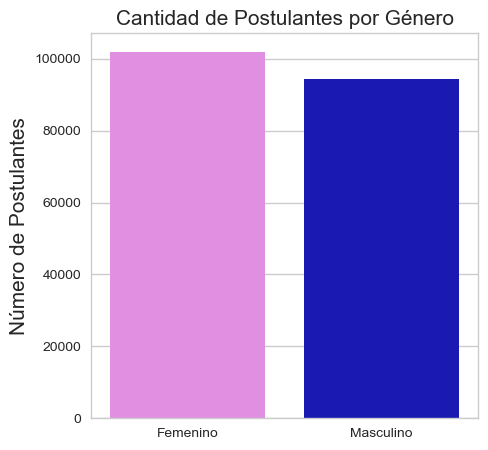

In [131]:
plt.figure(figsize=(5,5));
graf = sns.countplot(x='sexo', data=postulantes_genero_y_edad, order=postulantes_genero_y_edad['sexo'].value_counts().index, orient='v', palette=mujer_hombre)
graf.set_xticklabels(generos_labels(graf.get_xticklabels()),rotation=0)
graf.set_xlabel("", fontsize=15)
graf.set_ylabel("Número de Postulantes", fontsize=15)
graf.set_title("Cantidad de Postulantes por Género", fontsize=15)

In [132]:
postulantes_educacion = pd.read_csv("../Data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv");
postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [133]:
postulantes_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

In [134]:
postulantes_educacion_universitaria_completa=postulantes_educacion[(postulantes_educacion['nombre']=='Universitario')&(postulantes_educacion['estado']=='Graduado')];
postulantes_educacion_universitaria_completa.head()

,idpostulante,nombre,estado
671,5awk,Universitario,Graduado
674,NdJl,Universitario,Graduado
676,eo2p,Universitario,Graduado
678,8BkL,Universitario,Graduado
681,NPBx,Universitario,Graduado


In [135]:
postulantes_educacion_universitaria_completa = pd.merge(postulantes_educacion_universitaria_completa, postulantes_genero_y_edad, on='idpostulante', how='inner');
postulantes_educacion_universitaria_completa.head()

,idpostulante,nombre,estado,fechanacimiento,sexo
0,5awk,Universitario,Graduado,1962-12-04,FEM
1,NdJl,Universitario,Graduado,1969-05-09,MASC
2,eo2p,Universitario,Graduado,1981-02-16,MASC
3,8BkL,Universitario,Graduado,1976-07-21,FEM
4,NPBx,Universitario,Graduado,1981-03-09,MASC


Text(0.5,1,'Postulantes con Universidad Completada por Género')

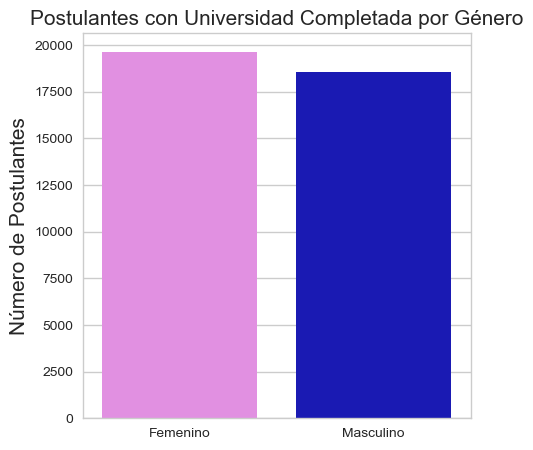

In [136]:
plt.figure(figsize=(5,5));
graf = sns.countplot(x='sexo', data=postulantes_educacion_universitaria_completa, order=postulantes_educacion_universitaria_completa['sexo'].value_counts().index, orient='v', palette=mujer_hombre)
graf.set_xticklabels(generos_labels(graf.get_xticklabels()),rotation=0)
graf.set_xlabel("", fontsize=15)
graf.set_ylabel("Número de Postulantes", fontsize=15)
graf.set_title("Postulantes con Universidad Completada por Género", fontsize=15)

In [137]:
postulantes_educacion_secundario_abandonado=postulantes_educacion[(postulantes_educacion['nombre']=='Secundario')&(postulantes_educacion['estado']=='Abandonado')];
postulantes_educacion_secundario_abandonado.head()

,idpostulante,nombre,estado
3602,1zDrrO,Secundario,Abandonado
3665,1rKDV3,Secundario,Abandonado
3746,6QGDAL,Secundario,Abandonado
7550,eZBaPp,Secundario,Abandonado
7634,5ME3OZ,Secundario,Abandonado


In [138]:
postulantes_educacion_secundario_abandonado = pd.merge(postulantes_educacion_secundario_abandonado, postulantes_genero_y_edad, on='idpostulante', how='inner');
postulantes_educacion_secundario_abandonado.head()

,idpostulante,nombre,estado,fechanacimiento,sexo
0,1zDrrO,Secundario,Abandonado,1972-01-29,MASC
1,1rKDV3,Secundario,Abandonado,1977-08-04,FEM
2,6QGDAL,Secundario,Abandonado,1961-07-24,MASC
3,eZBaPp,Secundario,Abandonado,1971-05-31,FEM
4,5ME3OZ,Secundario,Abandonado,1982-10-07,MASC


Text(0.5,1,'Postulantes con Secundario Abandonado por Género')

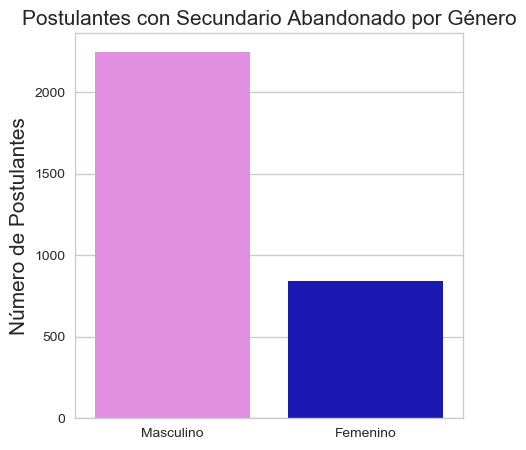

In [139]:
plt.figure(figsize=(5,5));
graf = sns.countplot(x='sexo', data=postulantes_educacion_secundario_abandonado, order=postulantes_educacion_secundario_abandonado['sexo'].value_counts().index, orient='v', palette=mujer_hombre)
graf.set_xticklabels(generos_labels(graf.get_xticklabels()),rotation=0)
graf.set_xlabel("", fontsize=15)
graf.set_ylabel("Número de Postulantes", fontsize=15)
graf.set_title("Postulantes con Secundario Abandonado por Género", fontsize=15)

In [140]:
postulaciones = pd.read_csv("../Data/datos_navent_fiuba/fiuba_4_postulaciones.csv");
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [141]:
postulaciones_por_genero = pd.merge(postulaciones, postulantes_genero_y_edad, on='idpostulante', how='inner');
postulaciones_por_genero.head()

,idaviso,idpostulante,fechapostulacion,fechanacimiento,sexo
0,1112257047,NM5M,2018-01-15 16:22:34,1970-12-03,FEM
1,1111920714,NM5M,2018-02-06 09:04:50,1970-12-03,FEM
2,1112346945,NM5M,2018-02-22 09:04:47,1970-12-03,FEM
3,1112345547,NM5M,2018-02-22 09:04:59,1970-12-03,FEM
4,1112237522,5awk,2018-01-25 18:55:03,1962-12-04,FEM


Text(0.5,1,'Cantidad de Postulaciones por Género')

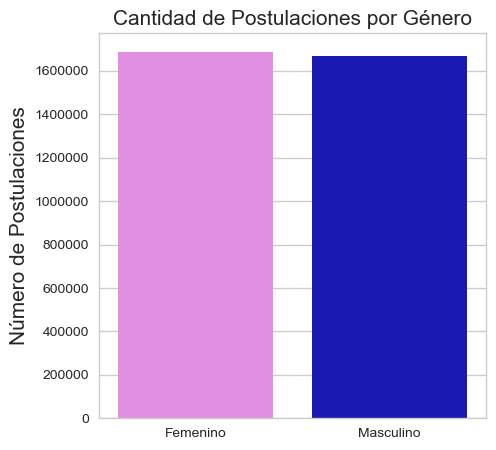

In [142]:
plt.figure(figsize=(5,5));
graf = sns.countplot(x='sexo', data=postulaciones_por_genero, order=postulaciones_por_genero['sexo'].value_counts().index, orient='v', palette=mujer_hombre)
graf.set_xticklabels(generos_labels(graf.get_xticklabels()),rotation=0)
graf.set_xlabel("", fontsize=15)
graf.set_ylabel("Número de Postulaciones", fontsize=15)
graf.set_title("Cantidad de Postulaciones por Género", fontsize=15)

In [143]:
vistas = pd.read_csv("../Data/datos_navent_fiuba/fiuba_3_vistas.csv");
vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [144]:
vistas_por_genero = pd.merge(vistas, postulantes_genero_y_edad, on='idpostulante', how='inner');
vistas_por_genero.head()

,idAviso,timestamp,idpostulante,fechanacimiento,sexo
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z,1991-11-16,MASC
1,1112301574,2018-02-27T11:28:37.162-0500,YjVJQ6Z,1991-11-16,MASC
2,1112319451,2018-02-27T11:26:31.101-0500,YjVJQ6Z,1991-11-16,MASC
3,1112326950,2018-02-27T11:28:43.417-0500,YjVJQ6Z,1991-11-16,MASC
4,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR,1989-12-08,MASC


TypeError: 'function' object is not iterable

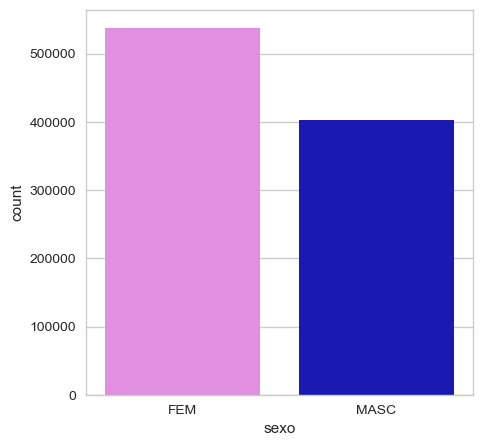

In [145]:
plt.figure(figsize=(5,5));
graf = sns.countplot(x='sexo', data=vistas_por_genero, order=vistas_por_genero['sexo'].value_counts().index, orient='v', palette=mujer_hombre)
graf.set_xticklabels(generos_labels,rotation=0)
graf.set_xlabel("", fontsize=15)
graf.set_ylabel("Número de Vistas", fontsize=15)
graf.set_title("Cantidad de Vistas por Género", fontsize=15)

In [ ]:
vistas_por_postulante_con_genero = vistas_por_genero.groupby('idpostulante').agg({'idAviso':'count','sexo':'max'})
vistas_por_postulante_con_genero.columns=['cantidadVistas', 'sexo']
vistas_por_postulante_con_genero.reset_index(level=0, inplace=True);
vistas_por_postulante_con_genero.head()

In [ ]:
postulaciones_por_postulante_con_genero = postulaciones_por_genero.groupby('idpostulante').agg({'idaviso':'count','sexo':'max'})
postulaciones_por_postulante_con_genero.columns=['cantidadPostulaciones', 'sexo'];
postulaciones_por_postulante_con_genero.reset_index(level=0, inplace=True);
postulaciones_por_postulante_con_genero.head()

In [ ]:
vistas_y_postulaciones_por_postulante= pd.merge(postulaciones_por_postulante_con_genero, vistas_por_postulante_con_genero, on='idpostulante', how='inner');
vistas_y_postulaciones_por_postulante=vistas_y_postulaciones_por_postulante.drop('sexo_y',1);
vistas_y_postulaciones_por_postulante.head()

In [ ]:
vistas_y_postulaciones_por_postulante['probabilidadDePostularse']= vistas_y_postulaciones_por_postulante['cantidadPostulaciones']/(vistas_y_postulaciones_por_postulante['cantidadVistas']+vistas_y_postulaciones_por_postulante['cantidadPostulaciones']);
vistas_y_postulaciones_por_postulante.head()

In [ ]:
postulaciones_por_vistas_por_genero=vistas_y_postulaciones_por_postulante.groupby('sexo_x').agg({'probabilidadDePostularse':'mean'});
postulaciones_por_vistas_por_genero.reset_index(level=0, inplace=True);
postulaciones_por_vistas_por_genero.head()

In [ ]:
plt.figure(figsize=(5,5));
graf = sns.barplot(x=postulaciones_por_vistas_por_genero.sexo_x, y=postulaciones_por_vistas_por_genero.probabilidadDePostularse, orient='v', palette=mujer_hombre)
graf.set_xticklabels(generos_labels,rotation=0)
graf.set_xlabel("", fontsize=15)
graf.set_ylabel("Postulaciones/Anuncios Vistos", fontsize=15)
graf.set_title("Relacion entre Postulaciones y Anuncios Vistos por Género", fontsize=15)

In [ ]:
avisos=pd.read_csv("../Data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv");
avisos.head()

In [ ]:
avisos_reducidos=avisos.drop(['titulo','descripcion','nombre_zona','ciudad','mapacalle','denominacion_empresa'],1);
avisos_reducidos.head()

In [ ]:
postulaciones_genero_y_detalles = pd.merge(postulaciones_por_genero, avisos_reducidos, on='idaviso', how='inner');
postulaciones_genero_y_detalles.head()

In [ ]:
postulaciones_genero_y_detalles['nombre_area'].value_counts()

In [ ]:
postulaciones_genero_y_detalles['nivel_laboral'].value_counts()

In [ ]:
postulaciones_genero_y_detalles['tipo_de_trabajo'].value_counts()

In [ ]:
graf = sns.countplot(x="nombre_area", hue="sexo", data=postulaciones_genero_y_detalles, palette=mujer_hombre, order=postulaciones_genero_y_detalles['nombre_area'].value_counts().iloc[:20].index);
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=90)
graf.set_title("Postulaciones en 20 principales Áreas y Género", fontsize=18)
graf.set_xlabel("Área", fontsize=18)
graf.set_ylabel("Cantidad de Postulaciones", fontsize=18)

In [ ]:
graf = sns.countplot(x="nivel_laboral", hue="sexo", data=postulaciones_genero_y_detalles, palette=mujer_hombre)
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=30)
graf.set_title("Postulaciones por tipo de trabajo y genero", fontsize=18)
graf.set_xlabel("Tipo de Trabajo", fontsize=18)
graf.set_ylabel("Cantidad de Postulaciones", fontsize=18)

In [ ]:
graf = sns.countplot(x="tipo_de_trabajo", hue="sexo", data=postulaciones_genero_y_detalles, palette=mujer_hombre)
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=30)
graf.set_title("Postulaciones por tipo de trabajo y genero", fontsize=18)
graf.set_xlabel("Tipo de Trabajo", fontsize=18)
graf.set_ylabel("Cantidad de Postulaciones", fontsize=18)

In [ ]:
postulaciones_areas_y_genero=postulaciones_genero_y_detalles;
postulaciones_areas_y_genero['eshombre']=(postulaciones_areas_y_genero['sexo']=='MASC');
postulaciones_areas_y_genero['esmujer']=(postulaciones_areas_y_genero['sexo']=='FEM');
postulaciones_areas_y_genero.head()

In [ ]:
postulaciones_areas_y_genero=postulaciones_areas_y_genero.groupby(['nombre_area']).agg({'eshombre':'sum', 'esmujer':'sum'});
postulaciones_areas_y_genero.head()

In [ ]:
postulaciones_areas_y_genero['desigualdad']=np.absolute(postulaciones_areas_y_genero['eshombre']-postulaciones_areas_y_genero['esmujer'])/(postulaciones_areas_y_genero['eshombre']+postulaciones_areas_y_genero['esmujer'])
postulaciones_areas_y_genero['total']=(postulaciones_areas_y_genero['eshombre']+postulaciones_areas_y_genero['esmujer']);
postulaciones_areas_y_genero=postulaciones_areas_y_genero.sort_values('desigualdad',ascending=0);
postulaciones_areas_y_genero.head(30)

In [ ]:
print(len(postulaciones_genero_y_detalles));
print(postulaciones_areas_y_genero['total'].sum());
print(postulaciones_areas_y_genero['total'].mean());

In [ ]:
postulaciones_areas_y_genero_acotada = postulaciones_areas_y_genero[postulaciones_areas_y_genero['total']>500];
postulaciones_areas_y_genero_acotada.head(30)

In [ ]:
graf = sns.countplot(x="nombre_area", hue="sexo", data=postulaciones_genero_y_detalles, palette=mujer_hombre, order=postulaciones_areas_y_genero_acotada.head(20).index);
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=90)
graf.set_title("Postulaciones por Genero en las 20 Areas más desiguales", fontsize=18)
graf.set_xlabel("", fontsize=18)
graf.set_ylabel("Cantidad de Postulaciones", fontsize=18)

In [ ]:
postulaciones_universitario_completo = pd.merge(postulaciones_genero_y_detalles,postulantes_educacion_universitaria_completa[['idpostulante','nombre', 'estado']],on='idpostulante', how='right');
postulaciones_universitario_completo.head()

In [ ]:
postulaciones_areas_y_genero_univ_completo=postulaciones_universitario_completo;
postulaciones_areas_y_genero_univ_completo['eshombre']=(postulaciones_areas_y_genero_univ_completo['sexo']=='MASC');
postulaciones_areas_y_genero_univ_completo['esmujer']=(postulaciones_areas_y_genero_univ_completo['sexo']=='FEM');
postulaciones_areas_y_genero_univ_completo.head()

In [ ]:
postulaciones_areas_y_genero_univ_completo=postulaciones_areas_y_genero_univ_completo.groupby(['nombre_area']).agg({'eshombre':'sum', 'esmujer':'sum'});
postulaciones_areas_y_genero_univ_completo.head()

In [ ]:
postulaciones_areas_y_genero_univ_completo['desigualdad']=np.absolute(postulaciones_areas_y_genero_univ_completo['eshombre']-postulaciones_areas_y_genero_univ_completo['esmujer'])/(postulaciones_areas_y_genero_univ_completo['eshombre']+postulaciones_areas_y_genero_univ_completo['esmujer'])
postulaciones_areas_y_genero_univ_completo['total']=(postulaciones_areas_y_genero_univ_completo['eshombre']+postulaciones_areas_y_genero_univ_completo['esmujer']);
postulaciones_areas_y_genero_univ_completo=postulaciones_areas_y_genero_univ_completo.sort_values('desigualdad',ascending=0);
postulaciones_areas_y_genero_univ_completo.head(30)

In [ ]:
print(len(postulaciones_universitario_completo));
print(postulaciones_areas_y_genero_univ_completo['total'].sum());
print(postulaciones_areas_y_genero_univ_completo['total'].mean());

In [ ]:
postulaciones_areas_y_genero_univ_completo_acot = postulaciones_areas_y_genero_univ_completo[postulaciones_areas_y_genero_univ_completo['total']>500];
postulaciones_areas_y_genero_univ_completo_acot.head(30)

In [ ]:
graf = sns.countplot(x="nombre_area", hue="sexo", data=postulaciones_universitario_completo, palette=mujer_hombre, order=postulaciones_areas_y_genero_univ_completo_acot.head(20).index);
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=90)
graf.set_title("Postulaciones por Genero en las 20 Areas\n más desiguales (Graduados universitarios)", fontsize=18)
graf.set_xlabel("", fontsize=18)
graf.set_ylabel("Cantidad de Postulaciones", fontsize=18)